In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt # visualizing data
%matplotlib inline
import seaborn as sns

In [31]:
df=pd.read_csv('Diwali Sales Data.csv',encoding= 'unicode_escape')
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [32]:
# DROPING UNNECESSARY COLOUMNS

df.drop(['Status','unnamed1','User_ID'],axis=1,inplace=True)

In [33]:
df.head()

,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [13]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [14]:
df.shape

(11239, 13)

In [16]:
# DROPPING NULL VALUES
df.dropna(inplace=True)

In [18]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [19]:
df.duplicated().sum()

8

In [23]:
# DROPPING DUPLICATE VALUES

df.drop_duplicates(inplace=True)

In [24]:
df.duplicated().sum()

0

In [25]:
# CHANIGING DATA TYPE 

df['Amount']=df['Amount'].astype(int)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11231 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11231 non-null  int64 
 1   Cust_name         11231 non-null  object
 2   Product_ID        11231 non-null  object
 3   Gender            11231 non-null  object
 4   Age Group         11231 non-null  object
 5   Age               11231 non-null  int64 
 6   Marital_Status    11231 non-null  int64 
 7   State             11231 non-null  object
 8   Zone              11231 non-null  object
 9   Occupation        11231 non-null  object
 10  Product_Category  11231 non-null  object
 11  Orders            11231 non-null  int64 
 12  Amount            11231 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


In [28]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [36]:
# DESCRIBE SPECIFIC COLOUMNS 

df[['Orders','Age']].describe()

,Orders,Age
count,11251.000000,11251.000000
mean,2.489290,35.421207
std,1.115047,12.754122
min,1.000000,12.000000
25%,1.500000,27.000000
50%,2.000000,33.000000
75%,3.000000,43.000000
max,4.000000,92.000000


#  EXPLORATORY DATA ANALYSIS

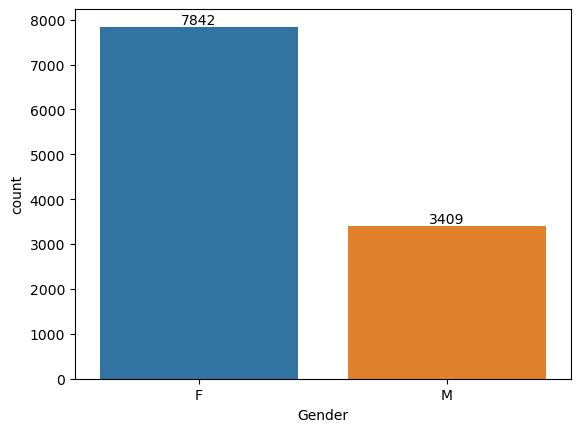

In [41]:
# plotting a count plot graph for gender

gen=sns.countplot(x='Gender',data=df)

for bars in gen.containers:
    gen.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

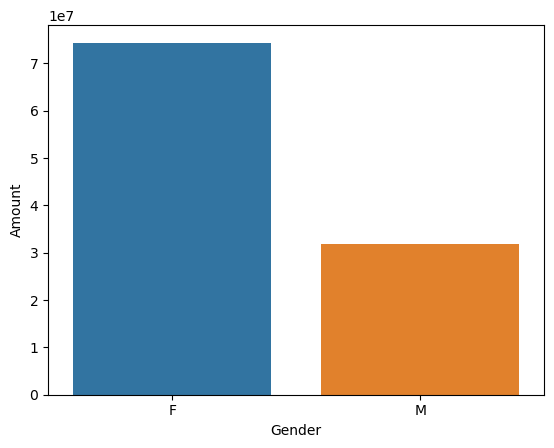

In [43]:
# plotting a bar graph ,gender vs total amount

sales_gender=(df.groupby('Gender',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False))

sns.barplot(x='Gender',y='Amount',data=sales_gender)

### From this graph we understood that maximum buyers are women and their purchasing power is also greater than men 

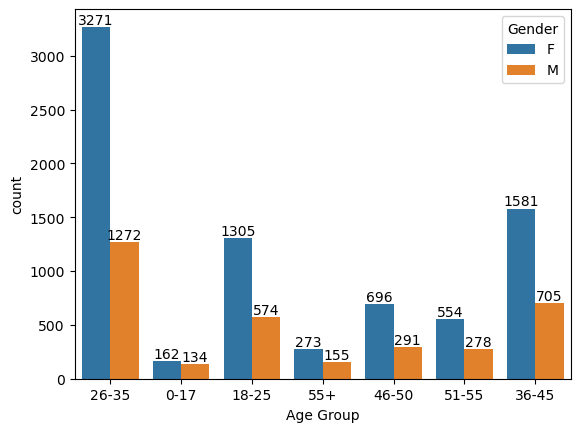

In [52]:
# plotting a bar graph ,gender vs age 

age=sns.countplot(x='Age Group',hue='Gender',data=df)

for bars in age.containers:
    age.bar_label(bars)

<Axes: xlabel='Age Group', ylabel='Amount'>

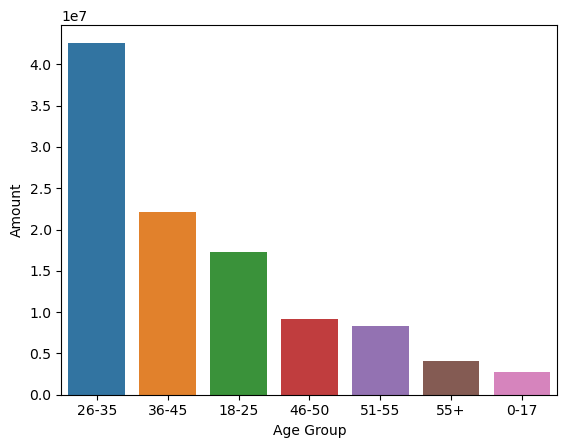

In [60]:
sales_agegroup=(df.groupby('Age Group',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False))

sns.barplot(x='Age Group',y='Amount',data=sales_agegroup)

### women of age group 26-35 are most potential buyers 

In [63]:
df['Product_Category'].value_counts()

Clothing & Apparel       2655
Food                     2493
Electronics & Gadgets    2087
Footwear & Shoes         1064
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 353
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                      100
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: Product_Category, dtype: int64

In [64]:
# PLOTTING A HEAT MAP FOR WOMENS/MENS FAVOURITE PRODUCT CATEGORY 

pd.crosstab(df['Gender'],df['Product_Category'])

Product_Category,Auto,Beauty,Books,Clothing & Apparel,Decor,Electronics & Gadgets,Food,Footwear & Shoes,Furniture,Games & Toys,Hand & Power Tools,Household items,Office,Pet Care,Sports Products,Stationery,Tupperware,Veterinary
Gender,,,,,,,,,,,,,,,,,,
F,66,325,39,1854,79,1476,1774,786,220,273,9,284,75,144,264,59,52,63
M,34,97,64,801,17,611,719,278,133,113,17,236,38,68,92,53,20,18


<Axes: xlabel='Product_Category', ylabel='Gender'>

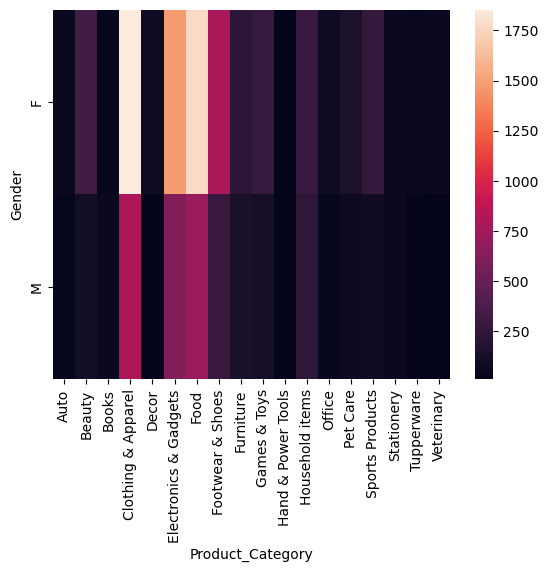

In [65]:
sns.heatmap(pd.crosstab(df['Gender'],df['Product_Category']))

###  from this graph we can see that womens spend mostly in clothing & apparel then food and then Electronics and same goes for men 

<Axes: xlabel='State', ylabel='Orders'>

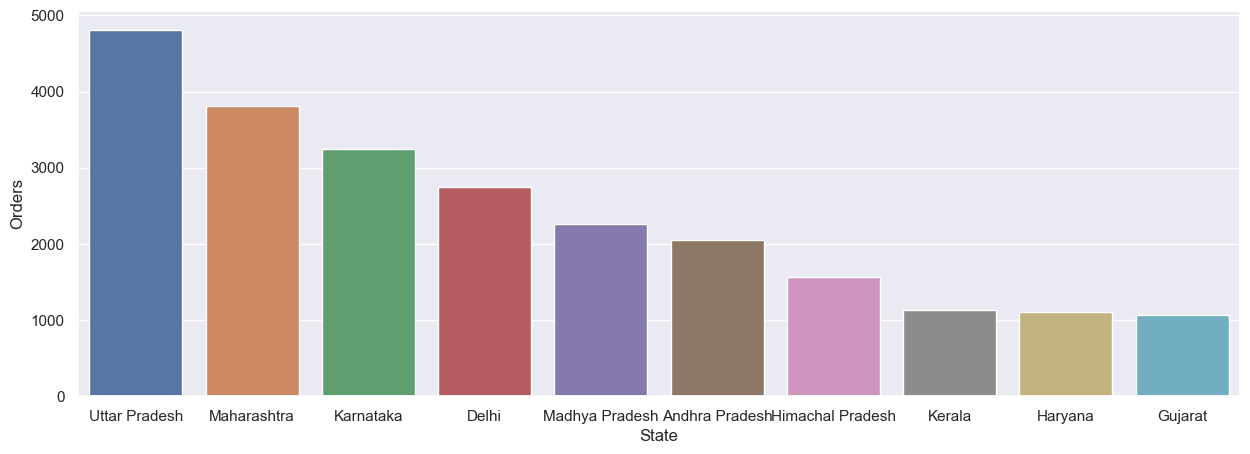

In [68]:
# total no. of orders  from top 10 states 
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Orders')

<Axes: xlabel='State', ylabel='Amount'>

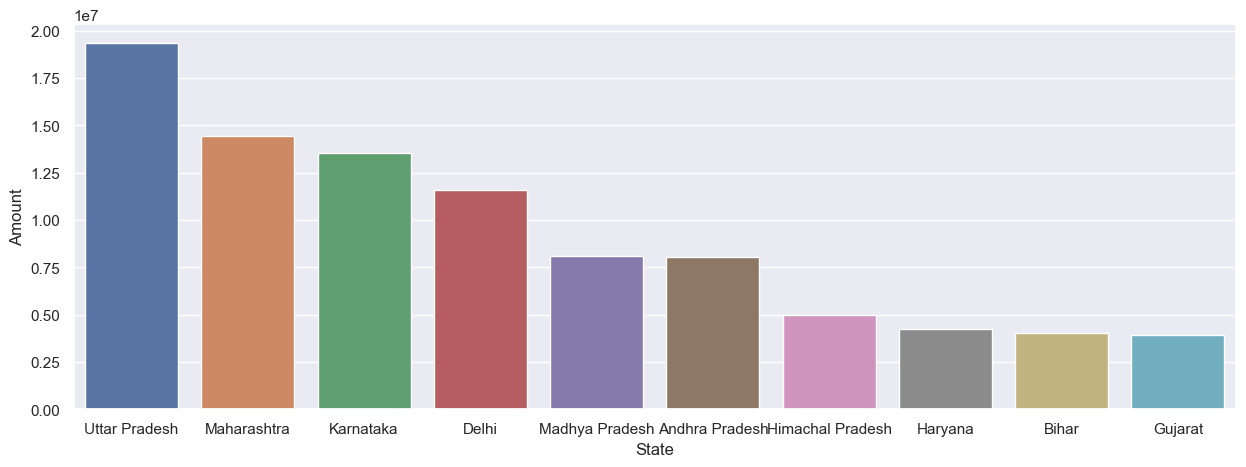

In [69]:
# total amount/sales from top 10 states

sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)

sns.set(rc={'figure.figsize':(15,5)})
sns.barplot(data = sales_state, x = 'State',y= 'Amount')

<Axes: xlabel='State', ylabel='Amount'>

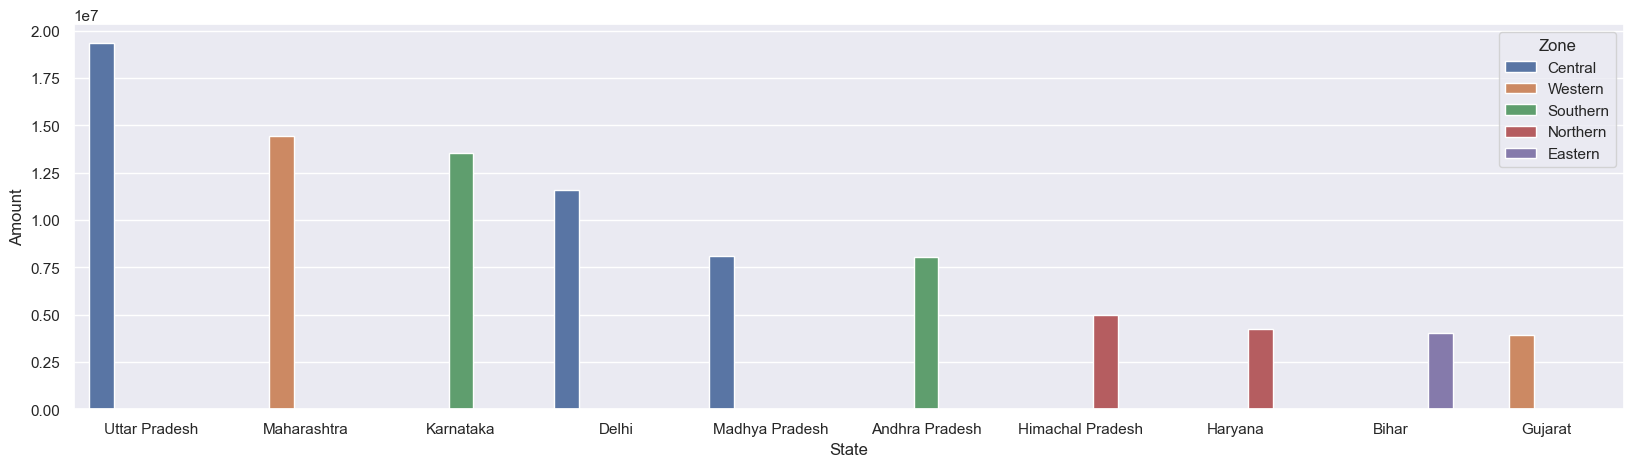

In [124]:
sales_zone=df.groupby(['State','Zone'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False).head(10)

sns.set(rc={'figure.figsize':(20,5)})
sns.barplot(x='State',y='Amount',hue='Zone',data=sales_zone)

### From above graphs we can see that most of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively and most sales are from southern zones of each state

In [67]:
df['Orders'].value_counts()

2    2895
1    2813
4    2775
3    2768
Name: Orders, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='Amount'>

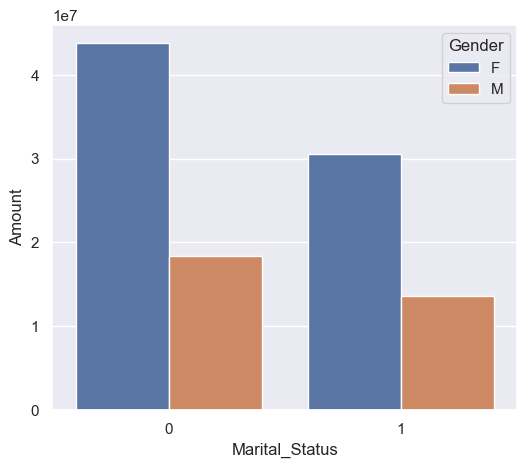

In [72]:
sales_state = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)

sns.set(rc={'figure.figsize':(6,5)})
sns.barplot(data = sales_state, x = 'Marital_Status',y= 'Amount', hue='Gender')

### This graph indicates that mostly buyers are unmarried women and their purchisnf power is also high

# OCCUPATION

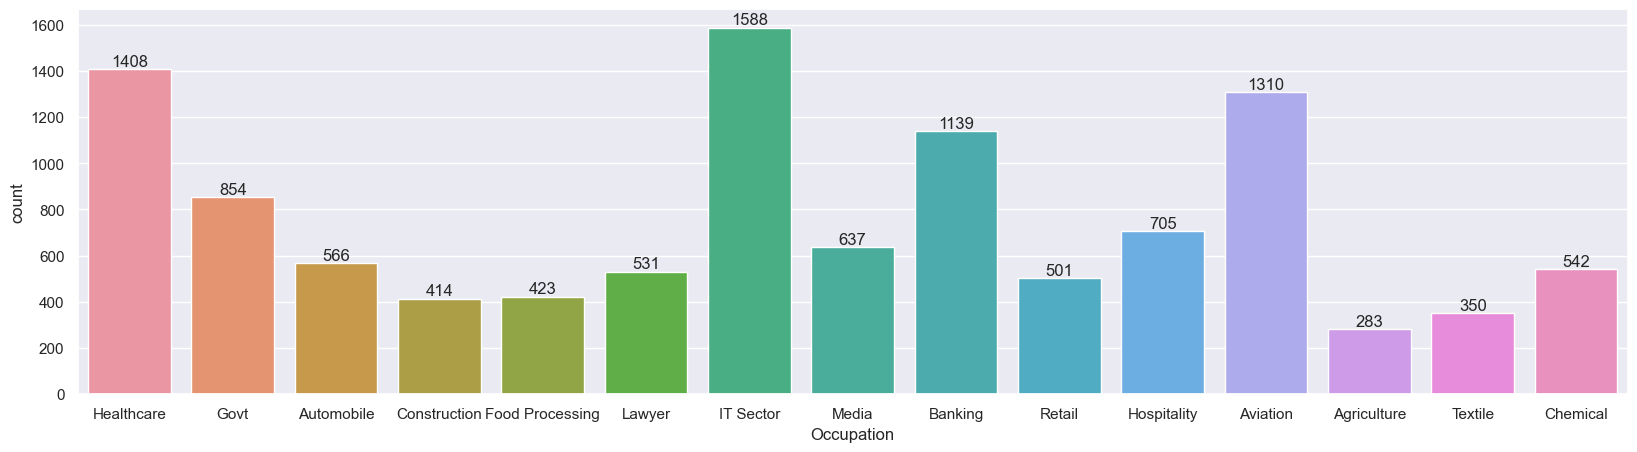

In [79]:
sns.set(rc={'figure.figsize':(20,5)})
ax = sns.countplot(data = df, x = 'Occupation')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Occupation', ylabel='Amount'>

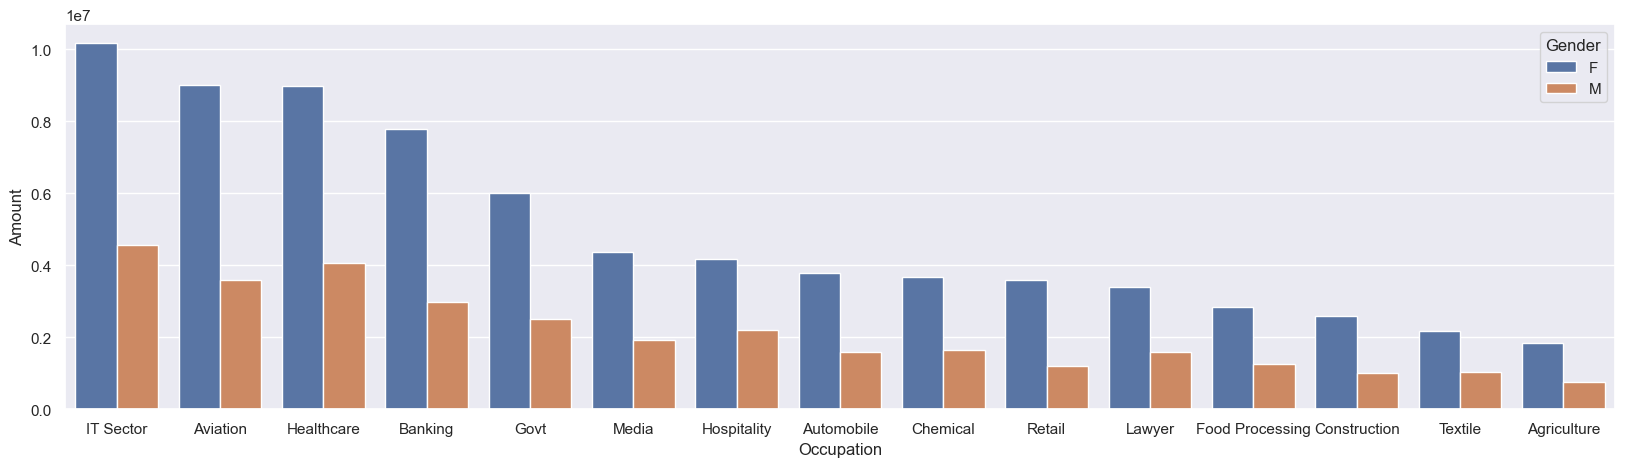

In [84]:
sales_occupation=df.groupby(['Occupation','Gender'],as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)

sns.barplot(x='Occupation',y='Amount',hue='Gender',data=sales_occupation)

<Axes: xlabel='Product_Category', ylabel='Orders'>

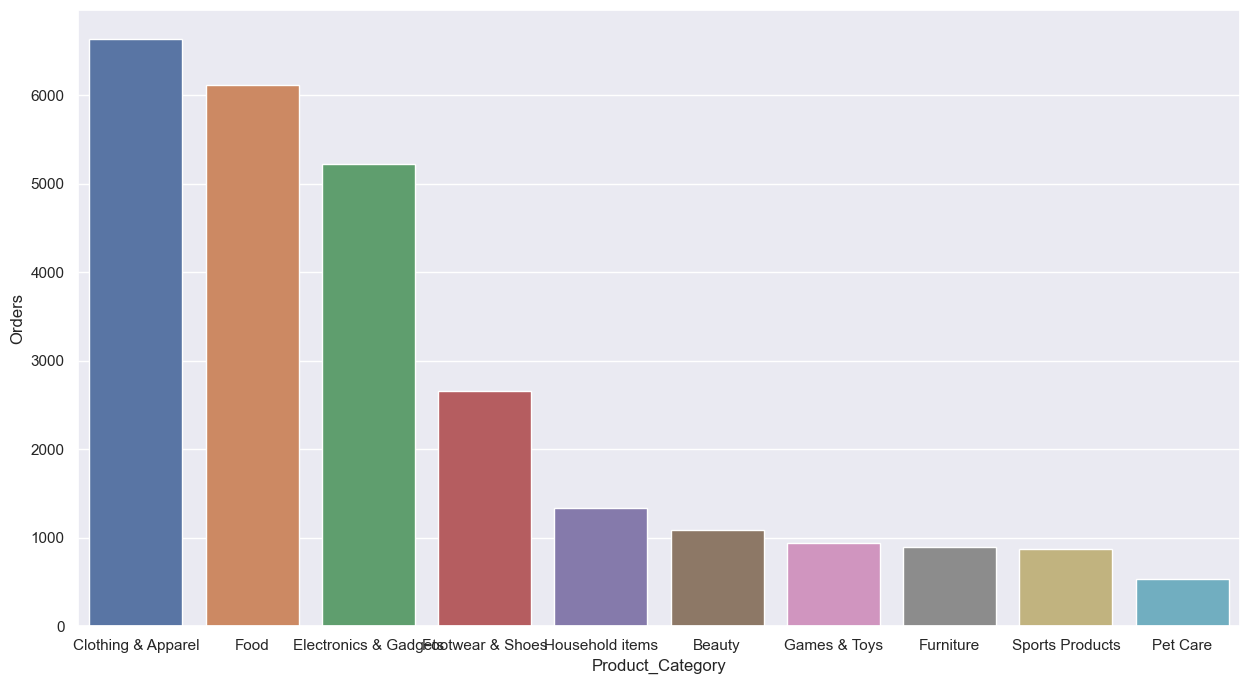

In [118]:
sales_occupation=df.groupby(['Product_Category'],as_index=False)['Orders'].sum().sort_values(by='Orders',ascending=False).head(10)
sns.set(rc={'figure.figsize':(15,8)})

sns.barplot(x='Product_Category',y='Orders',data=sales_occupation)

In [89]:
pd.crosstab(df['Occupation'],df['Product_Category'])

Product_Category,Auto,Beauty,Books,Clothing & Apparel,Decor,Electronics & Gadgets,Food,Footwear & Shoes,Furniture,Games & Toys,Hand & Power Tools,Household items,Office,Pet Care,Sports Products,Stationery,Tupperware,Veterinary
Occupation,,,,,,,,,,,,,,,,,,
Agriculture,1,10,3,70,2,47,68,24,5,5,1,14,7,7,8,4,3,4
Automobile,8,19,1,136,3,130,106,49,23,13,0,23,1,13,19,5,9,8
Aviation,12,39,22,281,8,242,312,128,43,40,2,77,11,26,35,14,11,7
Banking,12,36,11,274,16,252,213,112,41,47,7,42,8,15,30,12,2,9
Chemical,0,13,7,116,4,104,133,56,25,16,0,28,8,10,9,5,4,4
Construction,4,14,3,108,7,87,65,32,19,15,1,24,4,6,10,4,3,8
Food Processing,7,10,3,97,5,102,77,48,12,18,0,17,1,9,10,2,1,4
Govt,12,41,7,188,3,129,234,72,28,30,2,39,7,17,26,10,5,4
Healthcare,5,59,9,361,12,240,330,130,38,47,1,45,19,26,65,9,5,7


<Axes: xlabel='Product_Category', ylabel='Occupation'>

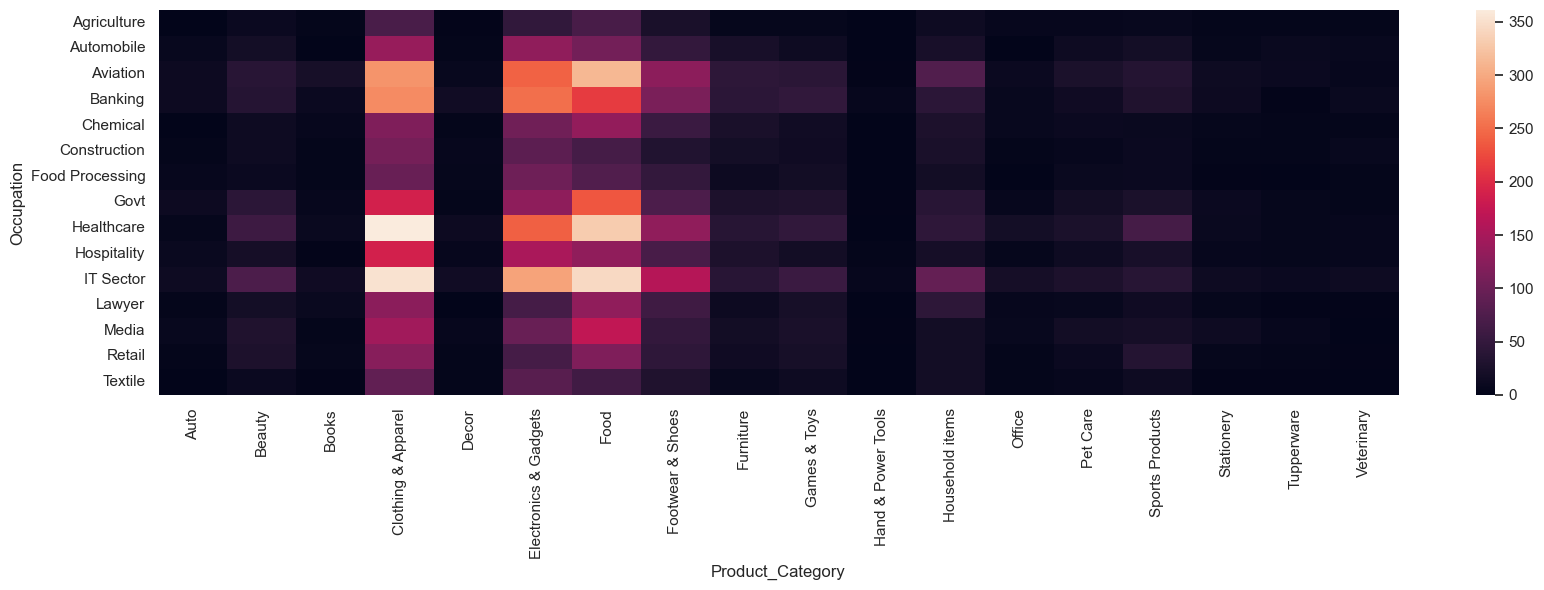

In [90]:
sns.heatmap(pd.crosstab(df['Occupation'],df['Product_Category']))

### From above graphs we can say that most of the buyers are from IT sector->Aviation->heathcare->Banking and the categories prefered by them are clothing and apparel ->food->electronics gadgets and so on

<Axes: xlabel='Age', ylabel='Amount'>

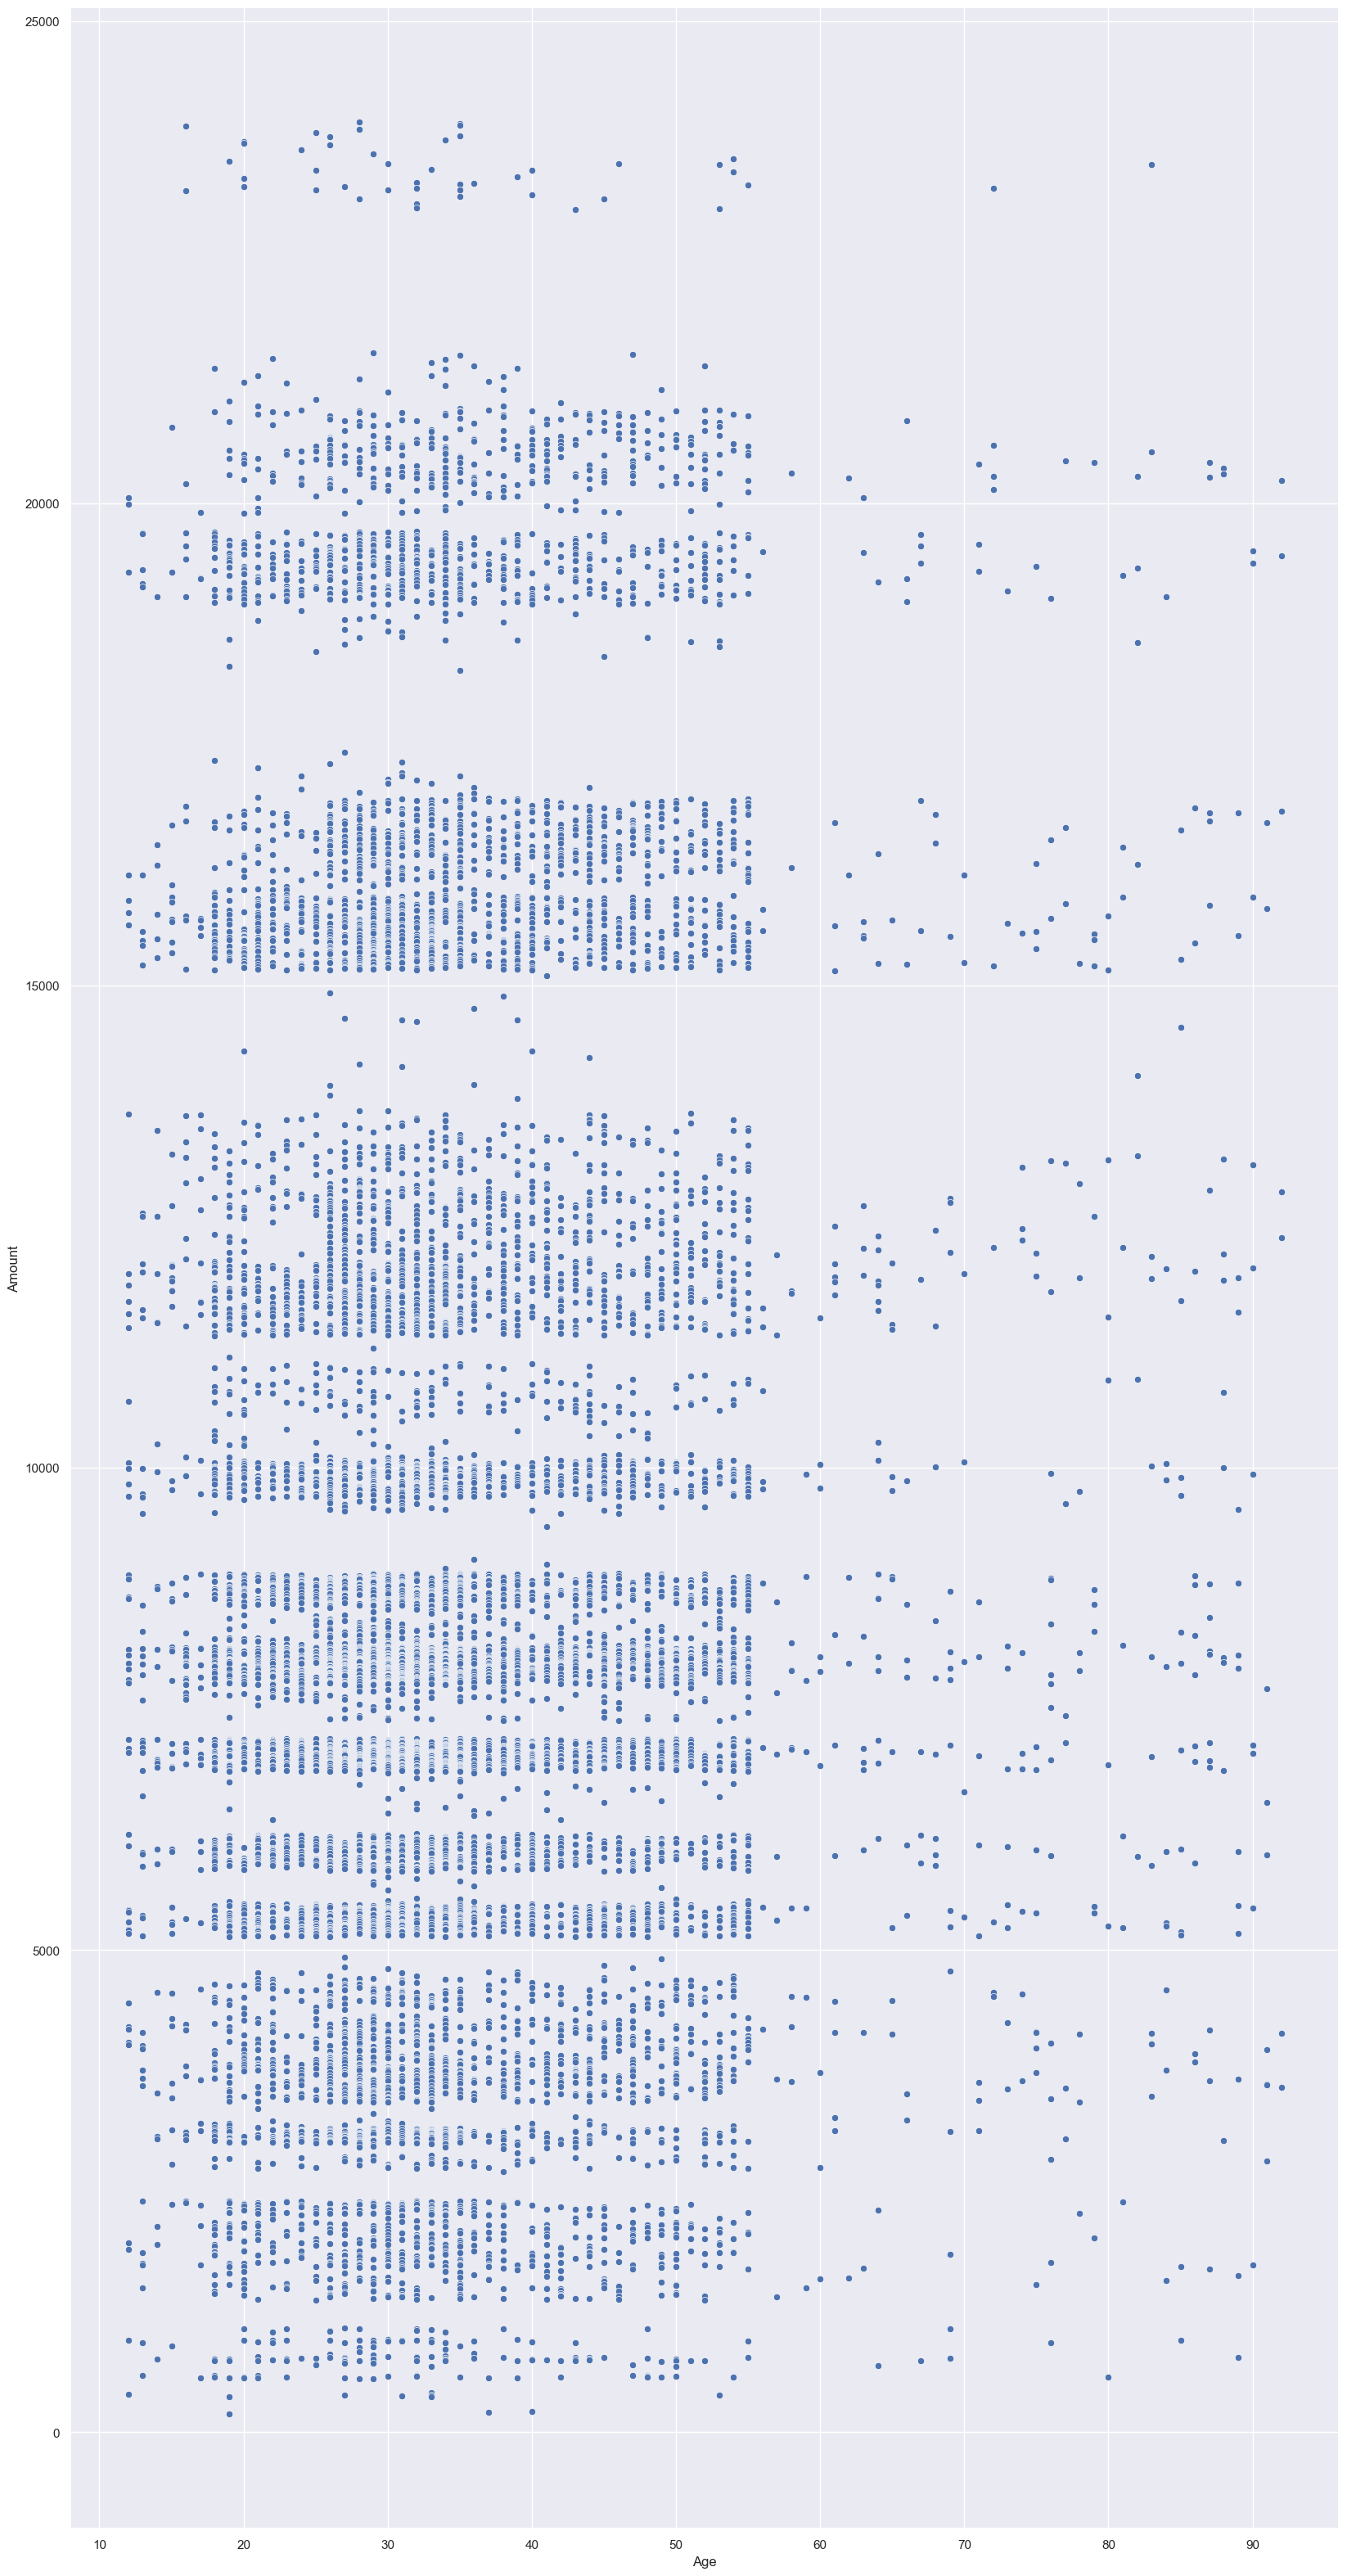

In [95]:
sns.set(rc={'figure.figsize':(20,40)})
sns.scatterplot(x='Age',y='Amount',data=df)

#  CONCLUSION 

### Most potential buyers are women from uttar pradesh,mainly southern region and they are mostly unmarried women of the age-group 26-35  working in the it sector and their favourites categories are clothing , food , electronics and so on .